<a href="https://colab.research.google.com/github/sehan25/ESAA-2022-1/blob/main/Assignment/0520_Python_Machine_Learning_p290-p318.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHAPTER 05. 회귀

## **01. 회귀 소개**
---

회귀 분석: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법  
통계학을 용어를 빌리자면 회귀는 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법을 통칭한다.


$$Y = W_{1}*X_{1} + W_{2}*X_{2} + W_{3}*X_{3} + \cdots + W_{n}*X_{n}$$
- Y는 종속변수, X1,...Xn은 독립변수, W1,...Wn은 독립변수의 값에 영향을 미치는 회귀 계수(Regression coefficients)이다.
- 독립변수는 피처에 해당되며 종속변수는 결정 값이다.
- 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수를 찾아내는 것**이다.

- 지도학습은 두 가지 유형으로 나뉘는데, 바로 분류와 회귀이다. 이 두 가지 기법의 가장 큰 차이는 분류는 예측값이 카테고리와 같은 이산형 클래스 값이고 회귀는 연속형 숫자 값이라는 것이다.
- 회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 여러 가지 유형으로 나눌 수 있다. 회귀에서 가장 중요한 것은 바로 회귀 계수이다.

|독립변수 개수|회귀 계수의 결합|
|---|---|
|1개: 단일 회귀|선형: 선형 회귀|
|여러 개: 다중 회귀|비선형: 비선형 회귀|

- 여러 가지 회귀 중에서 선형 회귀가 가장 많이 사용된다. 선형 회귀는 실제 값과 예측값의 차이 (오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식이다.
    - 선형 회귀 모델은 규제(Regularization) 방법에 따라 다시 별도의 유형으로 나뉠 수 있음. 
    - 규제는 일반적인 선형 회귀의 과적합 문제를 해결하기 위해서 회귀 계수에 패널티 값을 적용하는 것을 말함.
        - 일반 선형 회귀: 예측값과 실제 값의 RSS(Residual Sum of Squares)를 최소화할 수 있도록 회귀 계수를 최적화하며, 규제(Regularization)를 적용하지 않은 모델
        - 릿지(Ridge): 릿지 회귀는 선형 회귀에 L2 규제를 추가한 회귀 모델. L2 규제를 적용하는데, L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델
        - 라쏘(Lasso): 라쏘 회귀는 선형 회귀에 LI 규제를 적용한 방식. L2 규제가 회귀 계수 값의 크기를 줄이는 데 반해, L1 규제(피처 선택 기능)는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것
        - 엘라스틱넷(ElasticNet): L2, LI 규제를 함께 결합한 모델. 주로 피처가 많은 데이터 세트에서 적용되며, L1 규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정
        - 로지스틱 회귀(Logistic Regression): 로지스틱 회귀는 회귀라는 이름이 붙어 있지만, 사실은 분류에 사용되는 선형 모델. 로지스틱 회귀는 매우 강력한 분류 알고리즘. 일반적으로 이진 분류뿐만 아니라 희소 영역의 분류, 예를 들어 텍스트 분류와 같은 영역에서 뛰어난 예측 성능을 보임.


## **02. 단순 선형 회귀를 통한 회귀 이해**
---

단순 선형 회귀: 독립변수도 하나, 종속변수도 하나인 선형 회귀

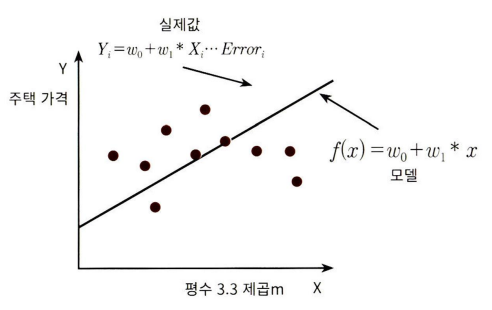

- 특정 기울기와 절편을 가진 1차 함수식으로 모델링할 수 있다.
- 예측값:  $$\hat{Y} = w_{0} + w_{1}*X$$ 로 계산할 수 있다.
    - 기울기 w1과 절편 w0을 회귀 계수로 지칭한다.
- 실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부른다.
- 최적의 회귀 모델을 만든다는 것은 바로 전체 데이터의 잔차(오류 값) 합이 최소가 되는 모델을 만든다는 의미이자 동시에 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미이다.
- 오류 값은 +나 -가 될 수 있기 때문에 오류 합을 계산할 때는 절댓값을 취해서 더하거나(Mean Absolute Error), 오류 값의 제곱을 구해서 더하는 방식(RSS, Residual Sum of Square)을 취한다. 일반적으로 미분 등의 계산을 편리하게 하기 위해서 RSS(Residual Sum of Square) 방식으로 오류 합을 구한다.  
즉, $$Error^{2} = RSS$$
    - RSS는 이제 변수가 w0, w1인 식으로 표현할 수 있으며, 이 RSS를 최소로 하는 w0, w1, 즉 회귀 계수를 학습을 통해서 찾는 것이 머신러닝 기반 회귀의 핵심 사항임
    - RSS는 회귀식의 독립변수 X, 종속변수 Y가 중심 변수가 아니라 w 변수(회귀 계수)가 중심 변수임을 인지하는 것이 매우 중요함(학습 데이터로 입력되는 독립변수와 종속변수는 RSS에서 모두 상수로 간주)
    - 정규화된 식: $$RSS(w_{0}, w_{1}) = \frac{1}{N}\sum_{i=1}^{N}(w_{0}+w_{1}*w_{i})^2$$
    $$(i는 1부터 학습 데이터의 총 건수 N까지)$$
    - 회귀에서 RSS는 비용(Cost)이며 w 변수(회귀 계수)로 구성되는 RSS를 비용 함수(또는 손실 함수(loss function))라고 함
    - 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값(즉, 오류 값)을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것


## **03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**
---

경사 하강법: 고차원 방정식에 대한 문제를 해결해 주면서 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 뛰어난 방식  
사전적 의미인 '점진적인 하강'이라는 뜻에서도 알 수 있듯이, '점진적으로 반복적인 계산을 통해 w 파라미터 값을 업데이트하면서 오류 값이 최소가 되 는 w 파라미터를 구하는 방식

- 경사 하강법은 반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가 지고 W 파라미터를 지속해서 보정해 나간다.
    - 최초 오류 값이 100이었다면 두 번째 오류 값은 100보다 작은 90, 세 번째는 80과 같은 방식으로 지속해서 오류를 감소시키는 방향으로 W 값을 계속 업데이트해 나갑니다. 그리고 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그때의 w값을 최적 파라미터로 반환함
- 경사 하강법의 핵심은“어떻게 하면 오류가 작아지는 방향으로 w값을 보정할 수 있을까?이다.
    - 예를 들어 비용 함수가 다음 그림과 같은 포물선 형태의 2차 함수라면 경사 하강법은 최초 w에서부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이트함. 마침내 더 이상 미분된 1차 함수의 기울기가 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주하고 그때의 w를 반환함

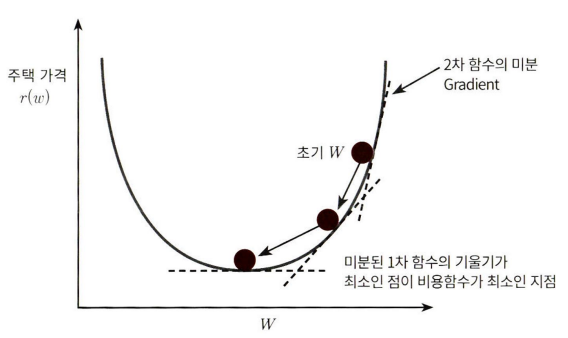

- 앞에서 언급한 비용 함수 RSS(w0, w1)를 편의상 R(w)로 지칭하며 R(w)는 변수가 w 파라미터로 이뤄진 함수이다.
- R(w)를 미분해서 미분 함수의 최솟값을 구해야 하는데, R(w)는 두 개의 w 파라미터인 w0과 w1을 각각 가지고 있기 때문에 일반적인 미분을 적용할 수가 없고, w0, w1 각 변수에 편미분을 적용해야 한다.
- R(w)를 w1, w0으로 편미분한 결과:
$$\frac{\partial R(w))}{\partial w_{1}} = \frac{2}{N}\sum_{i=1}^{N}-x_{i}*(y_{i}-(w_{0}+w_{1}x_{i})) = -\frac{2}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i}-예측값_{i})$$  
$$\frac{\partial R(w))}{\partial w_{0}} = \frac{2}{N}\sum_{i=1}^{N}-(y_{i}-(w_{0}+w_{1}x_{i})) = -\frac{2}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i}-예측값_{i})$$

- w1, w0의 편미분 결과값을 반복적으로 보정하면서 w1, w0 값을 업데이트하면 비용 함수 R(w)가 최소가 되는 w1, w0의 값을 구할 수 있다. 업데이트는 새로운 w1을 이전 w1에서 편미분 결괏값을 마이너스(-)하면서 적용한다. 즉  
$$새로운 w_{1} = 이전 w_{1}-(-\frac{2}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i}-예측값_{i}))$$
- 위 편미분 값이 너무 클 수 있기 때문에 보정 계수를 곱하는데, 이를 '학습률'이라고 한다. 요약하자면, 경사 하강법은 
$$새로운 w_{1} = 이전 w_{1}+\eta \frac{2}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i}-예측값_{i})$$, $$새로운 w_{0} = 이전 w_{0}+\eta \frac{2}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i}-예측값_{i})$$ 을 반복적으로 적용하면서 비용 함수가 최소가 되는 값을 찾는다.

*지금까지 정리한 수식과 절차를 이용해 경사 하강법을 파이썬 코드로 구현*
- 단순 선형 회귀로 예측할 만한 데이터 세트 만들기
    - 간단한 회귀 식인 y = 4X + 6을 근사하기 위한 100개의 데이터 세트를 만듦
    - 여기에 경사 하강법을 이용해 회귀 w1, w0을 도출함

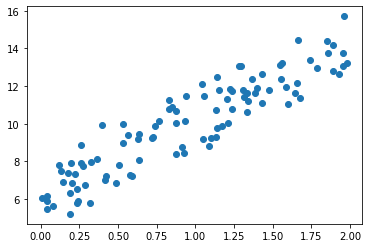

In [1]:
## 단순 선형 회귀로 예측할 만한 데이터 세트 만들기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦
X = 2 * np.random.rand(100,1)
y = 6 + 4 * X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

- 비용 함수 정의
    - 비용 함수 `get_cost()`는 실제 y 값과 예측된 y 값을 인자로 받아서
$$\frac{1}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i}-예측값_{i})^2$$을 계산해 반환

In [2]:
## 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y.pred))/N
    return cost

- 경사 하강법을 `gradient_descent()`라는 함수를 생성해 구현
    - `gradient_descent()`는 w1과 w0을 모두 0으로 초기화한 뒤 iters 개수만큼 반복하면서 w1과 w0을 업데이트함. 즉,
$$새로운 w_{1} = 이전 w_{1}+\eta \frac{2}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i}-예측값_{i})$$, $$새로운 w_{0} = 이전 w_{0}+\eta \frac{2}{N}\sum_{i=1}^{N}x_{i}*(실제값_{i}-예측값_{i})$$을 반복적으로 적용하면서 w1과 w0을 업데이트하는 것

- `get_weight_update()` 함수에서, 입력 배열 X값에 대한 예측 배열 y_pred는 `np.dt(X, w1.T) + w0`으로 구한다.
    - 100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)*wl + X(2)*w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적과 동일. 따라서 넘파이의 내적 연산인 `dot( )`를 이용해 `y_pred=np.dot(X, w1.T) + w0_update`로 예측 배열값을 계산
    - w1_update로 
$$-\eta \frac{2}{N}\sum_{i=1}^{N}x_{i}*(예측 오류_{i})$$를, w0_update로
$$-\eta \frac{2}{N}\sum_{i=1}^{N}(예측 오류_{i})$$ 값을 넘파이의 dot 행렬 연산으로 계산한 뒤 이를 반환


In [3]:
## 경사 하강법 함수 생성해 구현

# w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)

    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y - y_pred

    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T,diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T,diff))

    return w1_update, w0_update

- `get_weight_updates()`을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트 하는 함수인 `gradient_descent_steps()` 함수를 생성

In [4]:
## w1과 w0을 업데이트 하는 함수 생성

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    
    # w0과 w1을 모두 0으로 초기화
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    # 인자로 주어진 iters만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update

    return w1, w0

- `gradient_descent_steps()`를 호출해 w1과 w0 구하기
- 최종적으로 예측값과 실제값의 RSS 차이를 계산하는 `get_cost()` 함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산

In [5]:
## 예측값과 실제값의 RSS 차이 계산하는 함수 생성

def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


    실제 선형식인 y = 4X + 6과 유사하게 w1은 4.022, w0은 6.162가 도출됨. 예측 오류 비용은 약 0.9935

- 앞에서 구한 y_pred에 기반해 회귀선 그리기

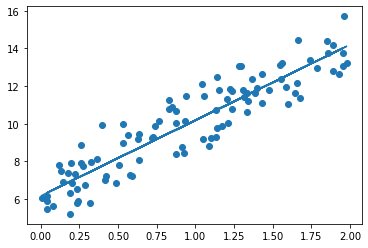

In [6]:
## 회귀선 그리기

plt.scatter(X, y)
plt.plot(X, y_pred)

- - 일반적으로 경사 하강법은 모든 학습 데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행 시간이 매우 오래 걸린다는 단점이 있다. 확률적 경사 하강법은 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장한다. 따라서 대용량의 데이터의 경우 대부분 확률적 경사 하강법이나 미니 배치 과률적 경사 하강법을 이용해 최적 비용함수를 도출한다.
- (미니 배치) 확률적 경사 하강법을 `stochastic_gradient_descent_steps()` 함수로 구현
    - 전체 X, y 데이터에서 랜덤하게 batch_size만큼 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 앞에서 생성한 `gradient_descnet_steps()`와 차이남

In [7]:
## 확률적 경사 하강법 함수 생성

def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)

        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]

        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
        
    return w1, w0

- `stochastic_gradient_descent_steps()`를 이용해 w1, w0 및 예측 오류 비용 계산

In [8]:
## w1, w0 및 예측 오류 비용 계산

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


    (미니 배치) 확률적 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 아주 조금 높을 뿐으로 큰 예측 성능상의 차이는 없음.
    따라서 큰 데이터를 처리할 경우에는 경사 하강법은 매우 시간이 오래 걸리므로 일반적으로 확률적 경사 하강법을 이용함

- 피처가 여러 개인 경우도 1개인 경우를 확장해 유사하게 도출할 수 있다
    - 피처가 한 개인 경우의 예측값
$$\hat{Y} = w_{0} + w_{1} * X$$로 회귀 계수 도출
    - 피처가 M개(X1, X2, ... , X100) 있다면 그에 따른 회귀 계수도 M + 1(1개는 w0)개로 도출
    - 즉,
$$\hat{Y} = w_{0} + w_{1}*X_{1} + w_{2}*X_{2} + \cdots + w_{100}*X_{100}$$과 같이 예측 회귀식 만들기 가능
        - 데이터의 개수가 N이고 피처 M개의 입렬 행렬을 Xmat, 회귀 계수 w1, w2, ..., w100을 W 배열로 표기하면 예측 행렬
$$\hat{Y} = np.dot(X_{mat}, W^{T}) + w_{0}$$로 구하기 가능
        - w0을 Weight의 배열인 W 안에 포함시키기 위해서 Xmat의 맨 처음 열에 모든 데이터의 값이 1인 피처 Feat 0을 추가 -> 예측값:  
        $$\hat{Y} = X_{mat} + W^{T}$$와 같이 도출 가능
        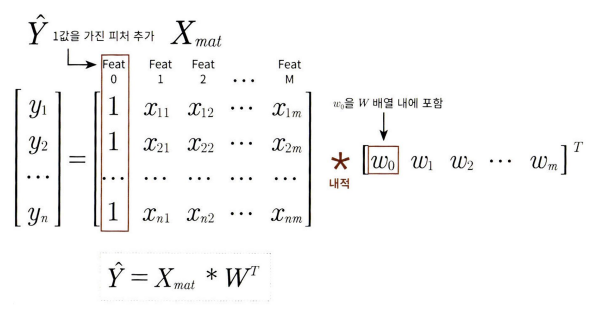

## **05. 다항 회귀와 과(대)적합/과소적합 이해**
--- 

다항(Polynomial) 회귀: 회귀과 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것

$$y = w_{0} + w_{1}*x_{1} + w_{2}*x_{2} + w_{3}*x_{1}*x_{2} + w_{4}*x_{1}^2 + w_{5}*x_{2}^2$$

- 한 가지 주의할 것은 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀라는 점이다. 회귀에서 선형 회귀/비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따른 것이지 독립변수의 선형/비선형 여부와는 무관하다.
- 사이킷런은 다항 회귀를 위한 클래스를 명시적으로 제공하지 않는다. 대신 다항 회귀 역시 선형 회기이기 때문에 비선형 함수를 선형 모델에 적용시키는 방법을 사용해 구현한다.
    - 사이킷런은 PolynomiaFeatures 클래스를 통해 피처를 Polynomial(다항식) 피처로 변환
    - PolynomialFeatures 클래스는 degree 파라미터를 통해 입력 받은 단항식 피처를 degree에 해당하는 다항식 피처로 변환
    - 다른 전처리 변환 클래스와 마찬가지로 PolynomialFeatures 클래스는 `fit(), transform()` 메서드를 통해 이 같은 변환 작업을 수행

- PolynomialFeatures를 이용해 단항값 [x1, x2]를 2차 다항값으로 [1, x1, x2, x1^2, x1x2, x2^2]로 변환

In [9]:
## PolynomialFeatures를 이용해 단항값을 2차 다항값으로 변환

from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 변환된 Polynomial 피처에 선형 회귀를 적용해 다항 회귀 구현
    - 3차 다항 계수를 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스를 이용해 유도
    - 3차 다항 회귀 함수를 임의로 설정하고 이의 회귀 계수 예측
    - 3차 다항 회귀의 결정 함수식은 다음과 같이 y = 1 + 2x1 + 3x1^2 + 4x2^3로 설정하고 이를 위한 함수 `polynomial_func()` 생성
        - 3차 다항 계수 피처 값이 입력되면 결정 값을 반환

In [10]:
## 3차 다항 회귀 함수 생성

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature: \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


- 일차 단항식 계수를 삼차 다항식 계수로 변환하고, 이를 선형 회귀에 적용하면 다항 회귀로 구현

In [11]:
## 삼차 다항식 계수로 변환시켜 다항 회귀로 구현

from sklearn.linear_model import LinearRegression

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수\n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape:', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape: (10,)


- 사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현
    - 이전 예제와 같이 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다 더 명료하게 작성하는 방법

In [12]:
## 사이킷런의 Pipeline 객체 이용하여 다항 회귀 구현

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


> ### 다항 회귀를 이용한 과소적합 및 과적합 이해
> ---

- 다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관계를 모델링할 수 있다. 다항식의 차수가 높아질수록 매우 복잡한 피처 간의 관계까지 모델링이 가능하다. 하지만 다항 회귀의 차수(degree)를 높일수록 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 오히려 예측 정확도가 떨어진다.

*다항 회귀의 차수를 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도 비교하는 예제*
- 사이킷런 홈페이지에서 다항 회귀를 이용해 과소적합과 과적합의 문제 잘 보여주는 예제 발췌
- 학습 데이터는 30개의 임의의 데이터인 X, 그리고 X의 코사인 값에서 약간의 잡음 변동 값을 더한 target인 y로 구성


In [13]:
## 데이터 구성

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터임
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun())에서 약간의 노이즈 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

- 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과 비교
    - 다항식 차수별로 학습을 수행한 뒤 `cross_val_score()`로 MSE 값을 구해 차수별 예측 성능을 평가
    - 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선 그리기


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87415100e+06  2.03715130e+07
 -1.44872551e+08  7.09311979e+08 -2.47064676e+09  6.24558367e+09
 -1.15676035e+10  1.56894317e+10 -1.54005437e+10  1.06456871e+10
 -4.91375763e+09  1.35919168e+09 -1.70380199e+08] 입니다.
Degree 15 MSE 는 180526263.32 입니다.


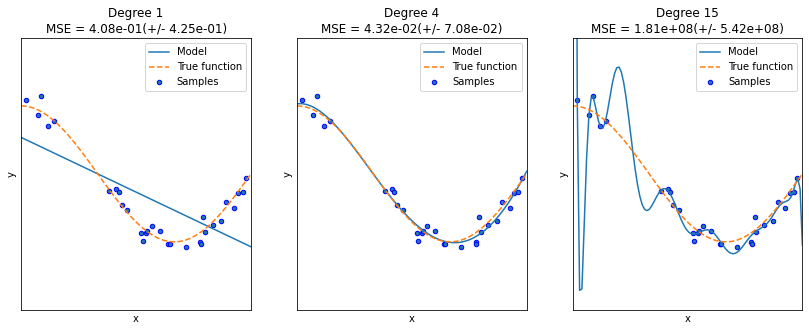

In [14]:
## 다항식 차수별로 예측 결과 비교

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    # 교차 검증으로 다항 회귀를 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)

    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients), 2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0,1)); plt.ylim((-2,2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

    Degree 1 예측 곡선은 단순한 직선으로서 단순 선형 회귀와 똑같음. 실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 너무 단순해 임. 예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못하고 있는 과소 적합 모델이 됨

    가운데 Degree 4 예측 곡선은 실제 데이터 세트와 유사한 모습. 변동하는 잡음까지 예측하지는 못했지만, 학습 데이터 세트를 비교적 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델이 됨. MSE 값은 약 0.043으로 가장 뛰어난 예측 성능을 나타냄

    맨 오른쪽 Degree 15 예측 곡선은 MSE 값이 182815432가 될 정도로 어처구니없는 오류 값이 발생함. 결과적으로 학습 데이터에 너무 충실하게 맞춘 과적합이 심한 모델이 됨


> ### 편향-분산 트레이드오프(Bias-Variance Trade Off)
> ---

- 일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있다. 즉, 편향이 높으면 분산 은 낮아지고(과소적합) 반대로 분산이 높으면 편향이 낮아진다(과적합).
- 다음 그림은 편향과 분산의 관계에 따른 전체 오류 값(Total Error)의 변화를 잘 보여준다.
    - 편향이 너무 높으면 전체 오류가 높음. 편향을 점점 낮추면 동시에 분산이 높아지고 전체 오류도 낮아지게 됨. 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 '골디락스' 지점을 통과하면서 분산을 지속적으로 높이면 전체 오류 값이 오히려 증가하면서 예측 성능이 다시 저하됨
    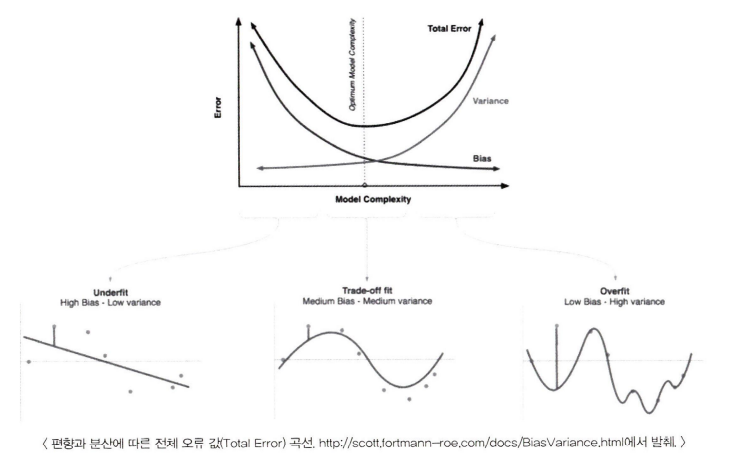

- 높은 편향/낮은 분산에서 과소적합되기 쉬우며 낮은 편향/높은 분산에서 과적합되기 쉽다.
- 편향과 분산이 서로 트레이드오프를 이루면서 오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이 가장 효율적인 머신러닝 예측 모델을 만드는 방법이다.
